# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# No hay valores nulos
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Creamos la serie sin la frecuencia porque no coge más de tres parámetros
time_series = pd.date_range('1/1/2018 00:00:00','1/1/2018 00:29:10',periods=sensor.shape[0])

Assign the time series index to the dataframe's index.

In [7]:
# Creamos un índice de tipo Datetime con la serie creada y la frecuencia 'infer', que averigua según la cantidad
# de filas, qué frecuencia tiene que aplicar, en este caso, segundos
sensor.index = pd.DatetimeIndex(time_series, freq='infer')

In [8]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [9]:
# Vemos que tiene frecuencia = segundos
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [10]:
import statsmodels.api as sm

In [11]:
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'],freq=60)
res.plot();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


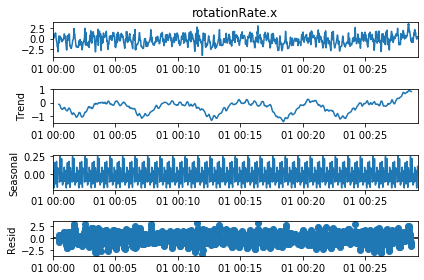

In [12]:
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'],freq=60)
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

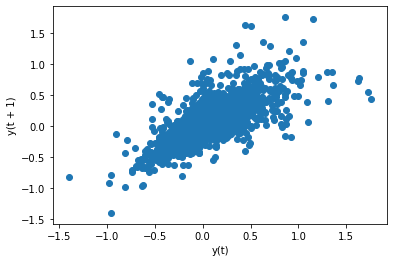

In [13]:
pd.plotting.lag_plot(sensor['userAcceleration.x']);

Create a lag plot for `rotationRate.x`

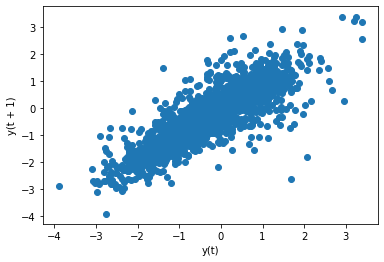

In [14]:
pd.plotting.lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

In [15]:
'''Existe una autocorrelación positiva'''

'Existe una autocorrelación positiva'

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [16]:
from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary | failed reject the null hyphotesis" if adfuller(X)[1] > 0.05 else "Stationary | reject the null hyphotesis"

print(f'userAcceleration.x --> {stationaryCheck(sensor["userAcceleration.x"])}')
print(f'rotationRate.x" --> {stationaryCheck(sensor["rotationRate.x"])}')

userAcceleration.x --> Stationary | reject the null hyphotesis
rotationRate.x" --> Stationary | reject the null hyphotesis


What are your conclusions from this test?

In [17]:
'''En este caso vemos que son variables estacionarias, es decir, que no dependen del tiempo. Por tanto,
se rechaza la hipótesis nula'''

'En este caso vemos que son variables estacionarias, es decir, que no dependen del tiempo. Por tanto,\nse rechaza la hipótesis nula'

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [18]:
from statsmodels.tsa.arima_model import ARMA

In [19]:
# Valores a entrenar y a predecir
predictions = dict()
realidad, futuro = sensor['userAcceleration.x'][:-10], sensor['userAcceleration.x'][-10:]
print(len(realidad),len(futuro))

1741 10


In [20]:
# Entrena el modelo ARMA
model = ARMA(realidad, order=(2, 1))
model_fit = model.fit(maxiter=10)

# Predice los valores
predictions['predictions'] = model_fit.predict(start=len(realidad),
                                    end=len(realidad)+len(futuro)-1, dynamic=False)

In [21]:
# Estos son los últimos 10 valores predichos
df_predict = pd.DataFrame(predictions)
df_predict

,predictions
2018-01-01 00:29:01,0.173149
2018-01-01 00:29:02,0.142896
2018-01-01 00:29:03,0.100522
2018-01-01 00:29:04,0.070106
2018-01-01 00:29:05,0.056099
2018-01-01 00:29:06,0.053778
2018-01-01 00:29:07,0.056790
2018-01-01 00:29:08,0.060646
2018-01-01 00:29:09,0.063316
2018-01-01 00:29:10,0.064493


In [22]:
# Comparativa con la realidad
df_predict2 = pd.DataFrame({
    "realidad": futuro,
    "prediccion": predictions['predictions'],
    "error": predictions['predictions'] - futuro,
})
df_predict2

,realidad,prediccion,error
2018-01-01 00:29:01,0.149749,0.173149,0.023400
2018-01-01 00:29:02,0.038461,0.142896,0.104435
2018-01-01 00:29:03,-0.169175,0.100522,0.269697
2018-01-01 00:29:04,-0.300361,0.070106,0.370467
2018-01-01 00:29:05,-0.270174,0.056099,0.326273
2018-01-01 00:29:06,-0.268367,0.053778,0.322145
2018-01-01 00:29:07,-0.102444,0.056790,0.159234
2018-01-01 00:29:08,-0.085590,0.060646,0.146236
2018-01-01 00:29:09,-0.048105,0.063316,0.111421
2018-01-01 00:29:10,-0.065011,0.064493,0.129504


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [23]:
from statsmodels.tools.eval_measures import rmse

compare = rmse(futuro, predictions['predictions'])

print(f'The RMSE is {compare}')

The RMSE is 0.2252986475815301


In [24]:
# Hago la media de los datos reales para comparar con el resultado de RMSE
media_realidad = df_predict2['realidad'].sum()/len(df_predict2['realidad'])
media_realidad

-0.1121017

In [25]:
'''Teniendo en cuenta que la media de los valores está en torno a 0, a pesar de que con el RMSE obtenemos un
valor cercano a 0, el rango de error es grande para la muestra de datos con los que comparamos'''

'Teniendo en cuenta que la media de los valores está en torno a 0, a pesar de que con el RMSE obtenemos un\nvalor cercano a 0, el rango de error es grande para la muestra de datos con los que comparamos'

### Si hacemos un gráfico, se puede ver que el margen de error es muy grande, ya que la predicción tiene unos valores mucho más suavizados que el futuro real

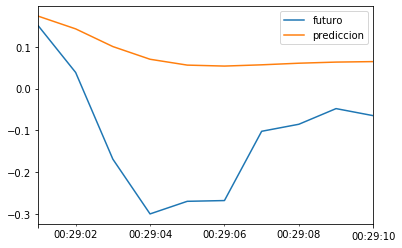

In [26]:
import matplotlib.pyplot as plt
futuro.plot()
predictions['predictions'].plot()
plt.legend(["futuro","prediccion"]);

## INTENTO DE LIMPIEZA DE RUIDO

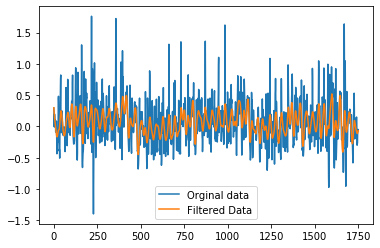

In [42]:
from scipy import signal

b, a = signal.butter(3, 1/10)
data_filtered = signal.filtfilt(b, a, sensor['userAcceleration.x'])

plt.plot(sensor['userAcceleration.x'].to_numpy())
plt.plot(data_filtered)
plt.legend(["Orginal data","Filtered Data"]);

In [28]:
# Compruebo que tiene la misma cantidad de datos que el DataFrame
data_filtered.shape

(1751,)

In [29]:
# Creo nueva columna con los datos filtrados
sensor['userAccelerationFilt.x'] = data_filtered

In [30]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,userAccelerationFilt.x
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0.298225
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0.258928
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0.221158
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0.185751
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0.153126


In [31]:
# Valores a entrenar y a predecir
predictions2 = dict()
realidad2, futuro2 = sensor['userAccelerationFilt.x'][:-10], sensor['userAccelerationFilt.x'][-10:]
print(len(realidad),len(futuro))

1741 10


In [32]:
# Entrena el modelo ARMA
model = ARMA(realidad2, order=(2, 0)) # aquí me saltaba un error y cambiando la q a 0 ya no, pero no entiendo por qué
model_fit = model.fit(maxiter=10)

# Predice los valores
predictions2['predictions'] = model_fit.predict(start=len(realidad2),
                                    end=len(realidad2)+len(futuro2)-1, dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
# Últimos 10 valores predichos
df_predict = pd.DataFrame(predictions2)
df_predict

,predictions
2018-01-01 00:29:01,-0.083506
2018-01-01 00:29:02,-0.084855
2018-01-01 00:29:03,-0.081309
2018-01-01 00:29:04,-0.073061
2018-01-01 00:29:05,-0.060452
2018-01-01 00:29:06,-0.043963
2018-01-01 00:29:07,-0.024192
2018-01-01 00:29:08,-0.001838
2018-01-01 00:29:09,0.022329
2018-01-01 00:29:10,0.047490


In [34]:
# Comparativa con la realidad
df_predict2 = pd.DataFrame({
    "realidad": futuro2,
    "prediccion": predictions2['predictions'],
    "error": predictions2['predictions'] - futuro2,
})
df_predict2

,realidad,prediccion,error
2018-01-01 00:29:01,-0.087745,-0.083506,0.004238
2018-01-01 00:29:02,-0.097399,-0.084855,0.012544
2018-01-01 00:29:03,-0.105466,-0.081309,0.024157
2018-01-01 00:29:04,-0.110993,-0.073061,0.037933
2018-01-01 00:29:05,-0.113089,-0.060452,0.052638
2018-01-01 00:29:06,-0.111187,-0.043963,0.067224
2018-01-01 00:29:07,-0.105193,-0.024192,0.081001
2018-01-01 00:29:08,-0.095507,-0.001838,0.093669
2018-01-01 00:29:09,-0.082934,0.022329,0.105263
2018-01-01 00:29:10,-0.068546,0.047490,0.116036


Aquí parece que algo de error se corrije

In [35]:
compare = rmse(futuro2, predictions2['predictions'])

print(f'The RMSE is {compare}')

The RMSE is 0.07026173730573418


Pero si hacemos una gráfica vemos sigue sin ajustarse a la realidad

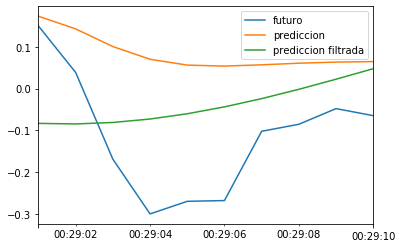

In [36]:
futuro.plot()
predictions['predictions'].plot()
predictions2['predictions'].plot()
plt.legend(["futuro","prediccion","prediccion filtrada"]);